In [2]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
advese_events = {
    "Gastrointestinal" : ["appetite decreased", "constipation", "diarrhea", "dyspepsia", "nausea", "vomiting", "gastrointestinal", "dry mouth"],
    "Fatigue": ["asthenia", "drowsiness", "somnolence", "fatigue"],
    "Pain" : ["hurt", "painful", "ache", "suffering", "intense pain", "severe pain", "misery", "abdominal pain"],
    "UTI Problem": ["voiding dysfunction", "urinary tract infection", "bladder infection", "urine leakage", "persistent incontinence", "bladder neck obstruction", "urinary leakage", "bladder pain", "urethral injury"],
    "Device Problem": ["mesh exposure", "mesh migration", "malfunction", "mesh revision surgery"],
    "Infection": ["infected", "infectious"],
    "Sleep Disorder": ["sleeplessness", "insomnia"],
    "Mental Stress": ["anxiety", "depression", "distress", "strain", "tension", "worried", "restless", "nervous"],
    "Prolapse": ['pelvic prolapse', 'uterine prolapse', 'pelvic organ prolapse', 'terovaginal prolapse'],
    "Vaginal Issue": ['vaginal discharge', 'vaginal atrophy', 'vaginal prolapse', 'vaginal spotting', 'vaginal odor', 'vaginal lesion', 'dyspareunia']  
}

In [2]:
merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [43]:
merged_files_filtered.shape

(9605, 37)

In [5]:
merged_files_filtered.columns

Index(['Unnamed: 0', 'MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC'],
      dtype='object')

In [3]:
filtered_df = merged_files_filtered.drop_duplicates()

In [7]:
filtered_df.shape

(9605, 37)

In [4]:
# FOI_TEXT DATE_RECEIVED
merged_files_filtered.isnull().sum()

Unnamed: 0                           0
MDR_REPORT_KEY                       0
MDR_TEXT_KEY                         0
TEXT_TYPE_CODE                       0
PATIENT_SEQUENCE_NUMBER              0
DATE_REPORT                       9605
FOI_TEXT                             0
DEVICE_EVENT_KEY                  9605
IMPLANT_FLAG                      9605
DATE_REMOVED_FLAG                 9605
DEVICE_SEQUENCE_NO                   0
DATE_RECEIVED                        0
BRAND_NAME                         514
GENERIC_NAME                         0
MANUFACTURER_D_NAME                 33
MANUFACTURER_D_ADDRESS_1           119
MANUFACTURER_D_ADDRESS_2          9527
MANUFACTURER_D_CITY                 92
MANUFACTURER_D_STATE_CODE          904
MANUFACTURER_D_ZIP_CODE            137
MANUFACTURER_D_ZIP_CODE_EXT       9452
MANUFACTURER_D_COUNTRY_CODE        119
MANUFACTURER_D_POSTAL_CODE         137
DEVICE_OPERATOR                     76
EXPIRATION_DATE_OF_DEVICE         5992
MODEL_NUMBER             

In [5]:
category_generic_name = merged_files_filtered["GENERIC_NAME"].value_counts().rename_axis('GENERIC_NAME').reset_index(name='COUNT')

In [44]:
merged_files_filtered["GENERIC_NAME"].value_counts()

GENERIC_NAME
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, RETR                       6857
MESH SURGICAL FOR STRESS URINARY INCONTINENCE MALE                                                     1644
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE, FEMA                        856
FEMALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                               147
MESH, SURGICAL, FOR STRESS URINARY INCONTINENCE, MALE                                                    24
MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR STRESS URINARY INCONTINENCE                               15
MALE STRESS URINARY INCONTINENCE SURGICAL MESH-SLING, SYNTHETIC POLYMER                                  13
SURGICAL MESH FOR STRESS URINARY INCONTINENCE                                                             8
DEVICE FOR STRESS URINARY INCONTINENCE                                                                    8
MESH, SURGICAL,

In [19]:
category_generic_name.head(10)

,GENERIC_NAME,COUNT
0,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",4105
1,MESH SURGICAL FOR STRESS URINARY INCONTINENCE ...,1301
2,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",643
3,FEMALE STRESS URINARY INCONTINENCE SURGICAL ME...,167
4,"MESH, SURGICAL, FOR STRESS URINARY INCONTINENC...",24
5,MALE STRESS URINARY INCONTINENCE SURGICAL MESH...,20
6,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",11
7,DEVICE FOR STRESS URINARY INCONTINENCE,8
8,SURGICAL MESH FOR STRESS URINARY INCONTINENCE,6
9,"MESH, SURGICAL, SYNTHETIC, UROGYNECOLOGIC, FOR...",6


In [ ]:
def categorize_generic_name(name):
    if 'FEMALE' in name or 'FEM' in name or 'UROGYNECOLOGIC' in name:
        return 'Female'
    elif 'MALE' in name:
        return 'Male'
    else:
        return 'General'

# Apply the grouping criteria
category_generic_name['Category'] = category_generic_name['GENERIC_NAME'].apply(categorize_generic_name)

# Group the data by category and sum the counts
grouped_data = category_generic_name.groupby('Category')['COUNT'].sum().reset_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='COUNT', data=grouped_data, palette='viridis')

# Customize the plot
plt.title('Distribution of Medical Device Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
merged_files_filtered["GENERIC_CATEGORY_SEX"] = merged_files_filtered['GENERIC_NAME'].apply(categorize_generic_name)

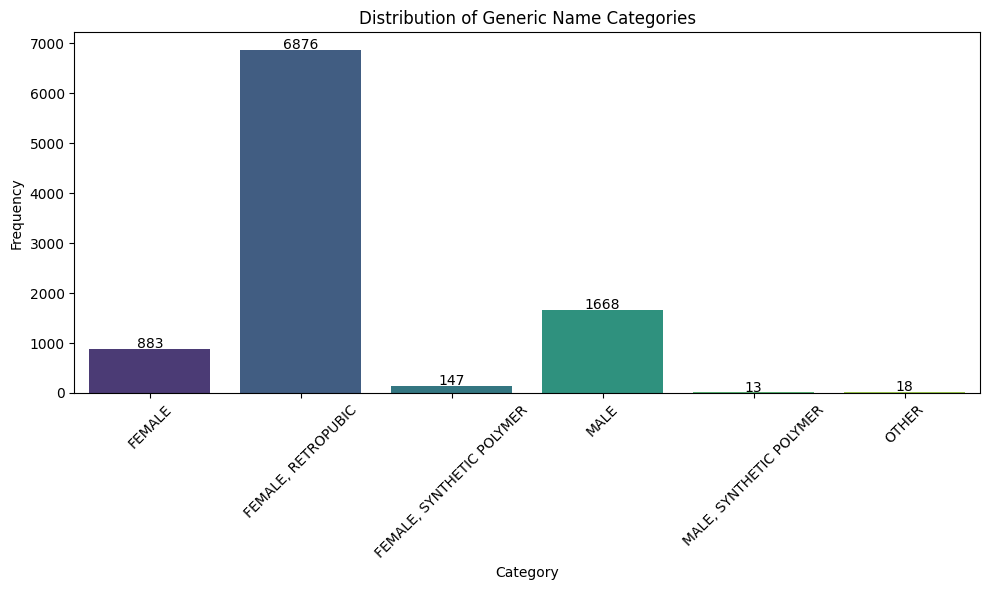

In [6]:
def categorize_generic_name_method(name):
    if 'RETR' in name or 'RET' in name or 'RETROP' in name or 'RETROPUBIC' in name:
        return 'FEMALE, RETROPUBIC'
    elif 'POLYMER' in name:
        if 'FEMALE' in name:
            return 'FEMALE, SYNTHETIC POLYMER'
        else:
            return 'MALE, SYNTHETIC POLYMER'
    elif 'UROGYNECOLOGIC' in name or 'FEMALE' in name:
        return 'FEMALE'
    elif 'MALE' in name:
        return 'MALE'
    else:
        return 'OTHER'

# Apply the grouping criteria
category_generic_name['Methods'] = category_generic_name['GENERIC_NAME'].apply(categorize_generic_name_method)

# Group the data by category and sum the counts
grouped_data = category_generic_name.groupby('Methods')['COUNT'].sum().reset_index()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Methods', y='COUNT', data=grouped_data, palette='viridis')
for index, value in enumerate(grouped_data['COUNT'].values):
    plt.text(index, value+15, str(value), ha='center')

# Customize the plot
plt.title('Distribution of Generic Name Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
grouped_data

,Methods,COUNT
0,FEMALE,665
1,"FEMALE, RETROPUBIC",4119
2,"MALE, SYNTHETIC POLYMER",187
3,OTHER,1341


In [116]:
events_list = [x for k,v in advese_events.items() for x in v]

In [117]:
topic_list = [k.lower() for k,v in advese_events.items()]

In [118]:
events_list.extend(topic_list)

In [106]:
('urine' in 'urine leakage')

True

In [3]:
irrelevant_words = [
    'pt', 'surgeon', 'would', 'b', 'patient', 'device', 'reported', 'procedure', 'information',
    'mesh', 'event', 'sling', 'code', 'date', 'report', 'implanted',
    'lot', 'unknown', 'complainant', 'could', 'corporation', 'analysis', 'reportable', 'physician', 'unspecified', 'number',
    'treatment', 'therefore', 'scientific', 'boston', 'block', 'also', 'additional', 'relevant', 'completed', 'upn', 'used'
    ]
# irrelevant_words = ['PATIENT', 'DEVICE', 'B']

In [45]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

In [25]:
stop_words = set(stopwords.words('english'))

In [4]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Tokenize the FOI_TEXT column
stop_words = set(stopwords.words('english'))
merged_files_filtered['tokens'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words and word.lower() not in irrelevant_words])

# Extract keywords from the tokens column
keywords = Counter()
for token_list in merged_files_filtered['tokens']:
    keywords.update(token_list)    

In [ ]:
word_tokenize("MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDENT DATE WAS NOT PROVIDED. LOT NUMBER NOT PROVIDED. UDI NOT PROVIDED RE-PROCESSING INFORMATION NOT PROVIDED. SINCE THE LOT NUMBER WAS NOT PROVIDED, THIS INFORMATION CANNOT BE DETERMINE")

In [ ]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Tokenize the FOI_TEXT column
stop_words = set(stopwords.words('english'))
merged_files_filtered['tokens'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.lower() in events_list])

# Extract keywords from the tokens column
keywords = Counter()
for token_list in merged_files_filtered['tokens']:
    keywords.update(token_list)    

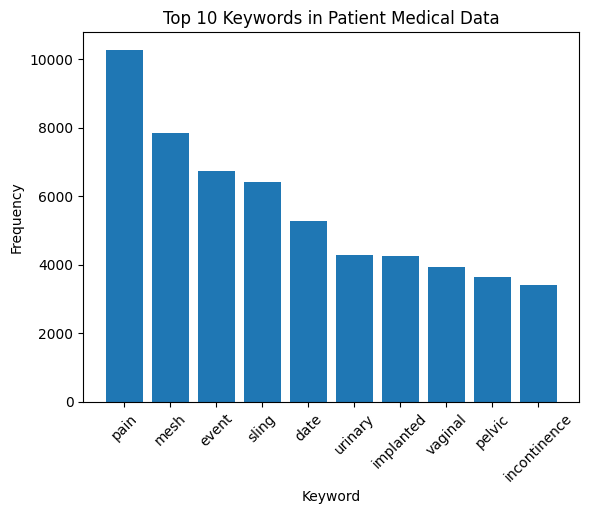

In [136]:
# Select the top 10 keywords and create a bar chart
top_keywords = dict(keywords.most_common(10))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Top 10 Keywords in Patient Medical Data')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [49]:
keywords.most_common(10)

[('pain', 19245),
 ('vaginal', 6819),
 ('urinary', 5949),
 ('pelvic', 5911),
 ('incontinence', 5452),
 ('bladder', 4323),
 ('complaint', 4004),
 ('performed', 3992),
 ('surgery', 3957),
 ('experienced', 3457)]

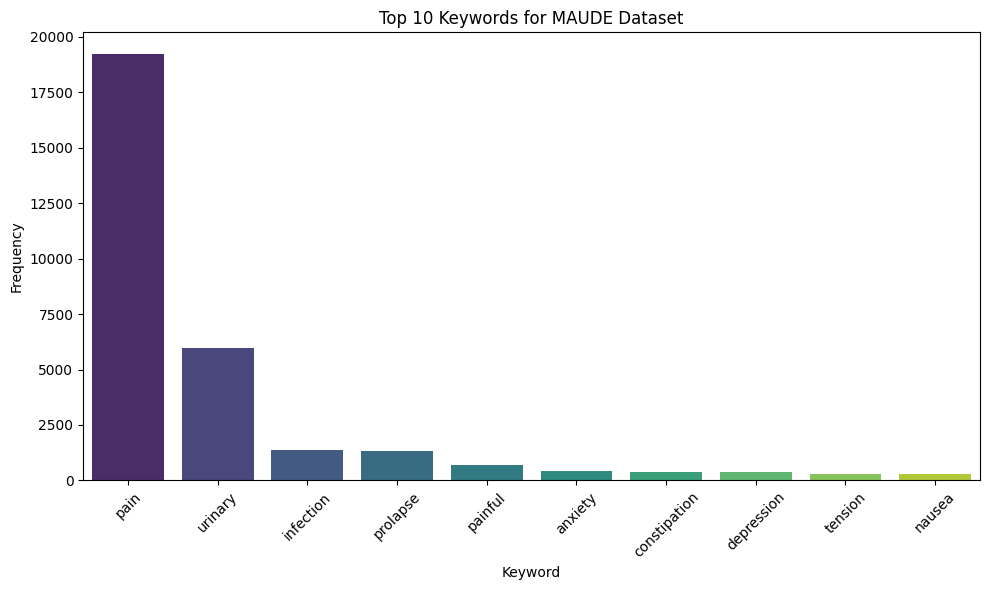

In [123]:
top_keywords = dict(keywords.most_common(10))
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_keywords.keys()), y=list(top_keywords.values()), palette='viridis')

# Customize the plot
plt.title('Top 10 Keywords for MAUDE Dataset')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
merged_files_filtered['tokens'].head()

0    [based, received, complaint, medtronic, produc...
1     [based, received, complaint, medtronic, product]
2             [provided, future, supplemental, issued]
3    [manufacturer, reference, incident, provided, ...
4    [attorney, alleged, deficiency, resulting, adv...
Name: tokens, dtype: object

In [75]:
from nltk.util import ngrams

def generate_bigrams(tokens):
    return [ '_'.join(x) for x in list(ngrams(tokens, 2))]

In [76]:
merged_files_filtered['bigrams'] = merged_files_filtered['tokens'].apply(generate_bigrams)

In [77]:
merged_files_filtered['bigrams'].head()

0    [based_received, received_complaint, complaint...
1    [based_received, received_complaint, complaint...
2    [provided_future, future_supplemental, supplem...
3    [manufacturer_reference, reference_incident, i...
4    [attorney_alleged, alleged_deficiency, deficie...
Name: bigrams, dtype: object

In [78]:
patient_text = merged_files_filtered["bigrams"].dropna()

In [111]:
patient_text = merged_files_filtered["tokens"].dropna()

In [79]:
mesh_text = ' '.join(str(lst) for review in patient_text for lst in review)

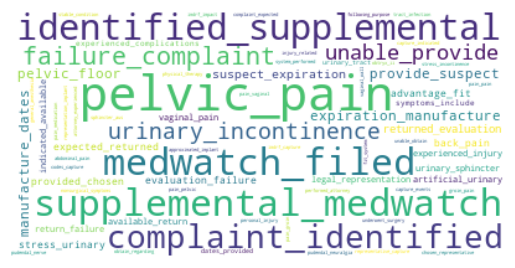

In [80]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [5]:
merged_files_filtered.shape

(9605, 37)

In [26]:
merged_files_filtered.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,DEVICE_AVAILABILITY,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,GENERIC_CATEGORY_SEX,tokens
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[based, additional, received, complaint, medtr..."
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[based, additional, received, complaint, medtr..."
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[provided, future, supplemental, report, issued]"
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[manufacturer, reference, number, incident, da..."
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,N,NaN,OTN,DA,N,N,NaN,NaN,Female,"[attorney, alleged, deficiency, resulting, uns..."


In [31]:
# FOI_TEXT DATE_RECEIVED
merged_files_filtered['DATE_RECEIVED'].isnull().sum()

0

In [4]:
patient_file = pd.read_csv('./data/patientthru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1")

/var/folders/xt/7gvkdnw143dgfgsp73bsn11w0000gn/T/ipykernel_4888/2275015965.py:1: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_file = pd.read_csv('./data/patientthru2023.zip', sep='|', quoting=3, encoding = "ISO-8859-1")


In [43]:
'PROLAPSE'.lower()

'prolapse'

In [28]:
patient_file.shape

(18104230, 10)

In [51]:
patient_file.columns

Index(['MDR_REPORT_KEY', 'PATIENT_SEQUENCE_NUMBER', 'DATE_RECEIVED',
       'SEQUENCE_NUMBER_TREATMENT', 'SEQUENCE_NUMBER_OUTCOME', 'PATIENT_AGE',
       'PATIENT_SEX', 'PATIENT_WEIGHT', 'PATIENT_ETHNICITY', 'PATIENT_RACE'],
      dtype='object')

In [59]:
patient_file[patient_file["MDR_REPORT_KEY"] == 6383024]

,MDR_REPORT_KEY,PATIENT_SEQUENCE_NUMBER,DATE_RECEIVED,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
6093461,6383024,1,03/06/2017,NaN,O; R,NaN,NaN,NaN,NaN,NaN


In [5]:
merged_patient_files = merged_files_filtered.join(patient_file, on = 'MDR_REPORT_KEY', how = 'left', rsuffix='_patient')

In [53]:
merged_patient_files.shape

(6312, 48)

In [67]:
merged_patient_files["SEQUENCE_NUMBER_OUTCOME"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6312 entries, 0 to 6311
Series name: SEQUENCE_NUMBER_OUTCOME
Non-Null Count  Dtype 
--------------  ----- 
2258 non-null   object
dtypes: object(1)
memory usage: 49.4+ KB


In [68]:
merged_patient_files.dtypes

Unnamed: 0                                  int64
MDR_REPORT_KEY                              int64
MDR_TEXT_KEY                                int64
TEXT_TYPE_CODE                             object
PATIENT_SEQUENCE_NUMBER                     int64
DATE_REPORT                               float64
FOI_TEXT                                   object
DEVICE_EVENT_KEY                          float64
IMPLANT_FLAG                              float64
DATE_REMOVED_FLAG                         float64
DEVICE_SEQUENCE_NO                        float64
DATE_RECEIVED                      datetime64[ns]
BRAND_NAME                                 object
GENERIC_NAME                               object
MANUFACTURER_D_NAME                        object
MANUFACTURER_D_ADDRESS_1                   object
MANUFACTURER_D_ADDRESS_2                   object
MANUFACTURER_D_CITY                        object
MANUFACTURER_D_STATE_CODE                  object
MANUFACTURER_D_ZIP_CODE                   float64


In [54]:
merged_patient_files.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,MDR_REPORT_KEY_patient,PATIENT_SEQUENCE_NUMBER_patient,DATE_RECEIVED_patient,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
merged_patient_files[merged_patient_files["MDR_REPORT_KEY"] == 6383024]["SEQUENCE_NUMBER_OUTCOME"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: SEQUENCE_NUMBER_OUTCOME, dtype: object

In [70]:
value_counts = merged_patient_files["PATIENT_AGE"].value_counts()

In [78]:
value_counts

PATIENT_AGE
63 YR       88
50 YR       77
58 YR       74
66 YR       74
45 YR       62
            ..
117 YR       2
33 MO        2
17 MO        2
98 YR        1
16425 DA     1
Name: count, Length: 102, dtype: int64

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Pie Chart Example')
plt.show()

In [79]:
value_counts[value_counts.index.str.contains('MO')]

PATIENT_AGE
26 MO    2
33 MO    2
17 MO    2
Name: count, dtype: int64

In [104]:
"28.000 YR".split()

['28.000', 'YR']

In [30]:
# Function to convert age to years
def convert_age_to_years(age_str):
    number, unit = age_str.split()
    number = int(float(number))
    if unit == 'YR':
        return number
    elif unit == 'MO':
        return number / 12
    elif unit == 'DA':
        return number / 365
    else:
        return np.nan

In [31]:
df = merged_patient_files[['MDR_REPORT_KEY', 'PATIENT_AGE']]

In [32]:
df_no_duplicates = df.dropna().drop_duplicates(keep='last')

In [113]:
df_no_duplicates.head(10)

,MDR_REPORT_KEY,PATIENT_AGE
10,6385690,73 YR
12,7060626,20 YR
21,6581494,58 YR
29,7116636,39 YR
35,6885243,60 YR
46,6800969,82 YR
60,6513285,59 YR
87,6344200,44 YR
90,6344078,28.000 YR
102,6347631,59 YR


In [ ]:
# df_no_duplicates['PATIENT_AGE'] = df_no_duplicates['PATIENT_AGE'].astype(str)

In [98]:
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2791 entries, 4 to 6311
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDR_REPORT_KEY  2791 non-null   int64 
 1   PATIENT_AGE     2791 non-null   object
dtypes: int64(1), object(1)
memory usage: 65.4+ KB


In [34]:
# Apply the function to convert ages to years
df_no_duplicates['age_in_years'] = df_no_duplicates['PATIENT_AGE'].apply(convert_age_to_years)

# Define the age bins and labels
bins = [0, 18, 35, 55, np.inf]
labels = ["0~18 Youth", "19~35 Adults", "36~55 Middle Aged", "56+ Senior"]

# Categorize ages into bins
df_no_duplicates['age_group'] = pd.cut(df_no_duplicates['age_in_years'], bins=bins, labels=labels, right=False)

# print(df_no_duplicates)

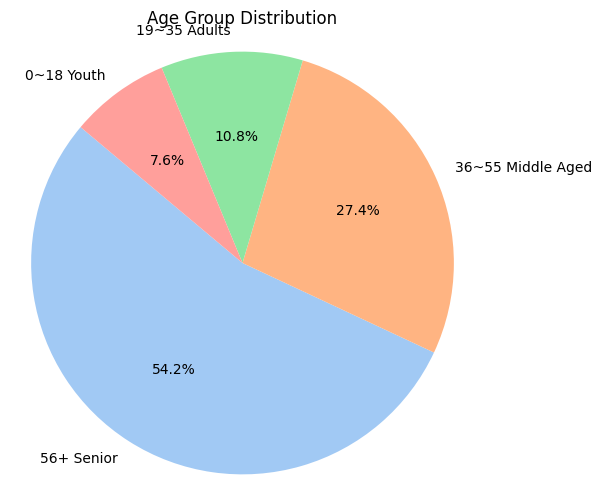

In [35]:
age_group_counts = df_no_duplicates['age_group'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [120]:
df_no_duplicates["age_group"].value_counts()

age_group
56+ Senior           574
36~55 Middle Aged    290
19~35 Adults         115
0~18 Youth            81
Name: count, dtype: int64

In [115]:
df['PATIENT_AGE'].unique()

array([nan, '73 YR', '20 YR', '58 YR', '39 YR', '60 YR', '82 YR', '59 YR',
       '44 YR', '28.000 YR', '72 YR', '57 YR', '36 YR', '30 YR', '61 YR',
       '63 YR', '16 YR', '31 YR', '75 YR', '66 YR', '65 YR', '7 YR',
       '45 YR', '24 YR', '54 YR', '78 YR', '83 YR', '67 YR', '69 YR',
       '68 YR', '42 YR', '77 YR', '49 YR', '40 YR', '62 YR', '53 YR',
       '64 YR', '10 YR', '46 YR', '48 YR', '43 YR', '26 YR', '84 YR',
       '22 YR', '41 YR', '47 YR', '13 YR', '8 YR', '56 YR', '74 YR',
       '52 YR', '87 YR', '117 YR', '12 YR', '51 YR', '34 YR', '89 YR',
       '92 YR', '14 YR', '23 YR', '81 YR', '4 YR', '55 YR', '76 YR',
       '35 YR', '29 YR', '71 YR', '9 YR', '19 YR', '80 YR', '5 YR',
       '38 YR', '11 YR', '28 YR', '50 YR', '32 YR', '70 YR', '16425 DA',
       '27 YR', '37 YR', '79 YR', '25 YR', '94 YR', '88 YR', '85 YR',
       '0 YR', '18 YR', '86 YR', '3 YR', '33 MO', '6 YR', '118 YR',
       '15 YR', '90 YR', '21 YR', '98 YR', '17 YR', '33 YR', '91 YR',
       '24455 

In [126]:
merged_patient_files.head()

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,MDR_REPORT_KEY_patient,PATIENT_SEQUENCE_NUMBER_patient,DATE_RECEIVED_patient,SEQUENCE_NUMBER_TREATMENT,SEQUENCE_NUMBER_OUTCOME,PATIENT_AGE,PATIENT_SEX,PATIENT_WEIGHT,PATIENT_ETHNICITY,PATIENT_RACE
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,703425,6383024,69202957,D,1,NaN,THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AG...,NaN,NaN,NaN,...,6673778.0,1.0,06/28/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
sex_no_duplicates = merged_patient_files[['MDR_REPORT_KEY', 'PATIENT_SEX']].dropna().drop_duplicates(keep='last')
sex_no_duplicates.head()

,MDR_REPORT_KEY,PATIENT_SEX
776,7474548,Male
1080,7904766,Female
1107,7961455,Male
1136,7993630,Male
1286,8192615,Male


In [10]:
sex_no_duplicates["PATIENT_SEX"].value_counts()

PATIENT_SEX
Male                      401
Female                    390
Prefer Not To Disclose      8
Name: count, dtype: int64

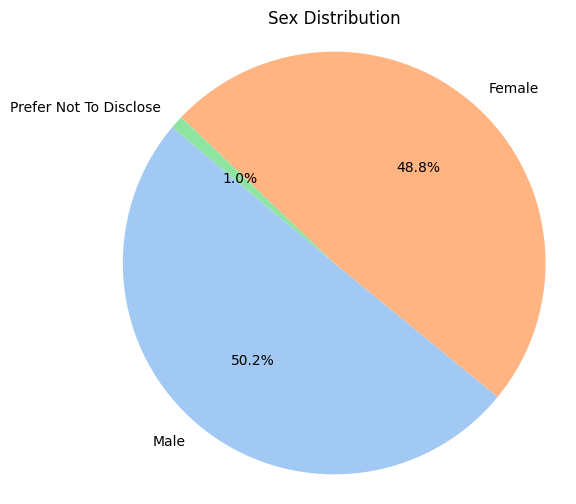

In [11]:
sex_group_counts = sex_no_duplicates['PATIENT_SEX'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_group_counts, labels=sex_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
merged_patient_files['PATIENT_SEX'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PATIENT_SEX, dtype: object

In [40]:
# GENERIC_CATEGORY_SEX
len(merged_patient_files[(merged_patient_files['GENERIC_CATEGORY_SEX'] == 'Female') & (merged_patient_files['PATIENT_SEX'].isna())])

3934

In [41]:
len(merged_patient_files[(merged_patient_files['GENERIC_CATEGORY_SEX'] == 'Male') & (merged_patient_files['PATIENT_SEX'].isna())])

1173

In [12]:
condition_female = merged_patient_files['GENERIC_NAME'].str.contains('FEMALE|UROGYNECOLOGIC', case=False, na=False)
condition_male = merged_patient_files['GENERIC_NAME'].str.contains('MALE', case=False, na=False)

# Update the 'PATIENT_SEX' column based on these conditions
merged_patient_files.loc[condition_female, 'PATIENT_SEX'] = 'Female'
merged_patient_files.loc[condition_male, 'PATIENT_SEX'] = 'Male'

In [13]:
sex_no_duplicates = merged_patient_files[['MDR_REPORT_KEY', 'PATIENT_SEX']].dropna().drop_duplicates(keep='last')
sex_no_duplicates["PATIENT_SEX"].value_counts()

PATIENT_SEX
Female    2956
Male      1115
Name: count, dtype: int64

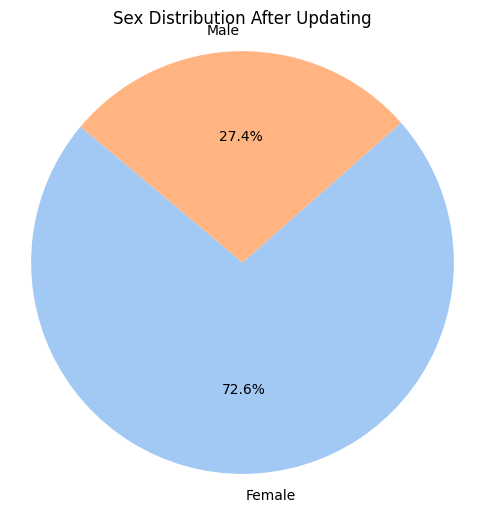

In [15]:
sex_group_counts = sex_no_duplicates['PATIENT_SEX'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sex_group_counts, labels=sex_group_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Sex Distribution After Updating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# mesh erosion, organ perforation, mesh exposure, severe pain and re-surgery
# voiding dysfunction, dry mouth, fatigue, gastrointestinal complaints,urinary tract infections (UTI)
# 
# CNS: dizziness, Discontinue due to adverse event, Dry mouth, Fatigue: asthenia,
# Fatigue or drowsiness, Fatigue: somnolence, 
# GI: abdominal pain, GI: appetite decreased, GI: constipation, GI: diarrhea, GI: dyspepsia, GI: nausea,
# GI: vomiting, Headache, Infection, urinary tract, Sleep disorder: insomnia, Sweating, excessive, 
# Urinary: voiding dysfunction, Visual adverse effects

'dizziness, Discontinue, Dry mouth'
'Fatigue, asthenia, drowsiness, somnolence'
'GI, abdominal pain, appetite decreased, constipation, diarrhea, dyspepsia, nausea, vomiting'
'Headache, Infection'
'urinary tract, voiding dysfunction'
'Sleep disorder: insomnia'
'Sweating, excessive'
'Visual adverse effects'

The rates of overall and specific device and procedure related adverse events, such as mesh erosion, organ perforation, mesh exposure, urinary retention, and painful intercourse (dyspareunia) and the rate of re-surgeries or need for mesh removal (explantation), collected over 1-5 years of follow-up were also compared between the SUI mini-slings and the traditional mid-urethral slings as part of the SLR. The SLR demonstrated that the clinical performance of SUI mini-slings is comparable to the traditional mid-urethral slings through 5 years.

In [6]:
merged_files_filtered["FOI_TEXT"].str.contains("PAIN|INFECTION|SICK|BLEEDING|EROSION|SEVERE|DEMAGE|TIGHT|HEALTH PROBLEM|ABNORMAL|ANXIETY|NEGATIVE|DIFFICULT|ACHES|PAINFUL|DIARRHEA|BOWEL OBSTRUCTION|INCONTINENCE|DIED|BOWEL PROBLEMS|ANAL|DYSPAREUNIA|PAINfUL SEXUAL INTERCOURSE|REMOVAL|COME OUT|WEAKNESS|NUMBNESS").value_counts()

FOI_TEXT
True     6626
False    2979
Name: count, dtype: int64

In [154]:
merged_files_filtered["FOI_TEXT"].str.contains('VAGINAL LESION').sum()

6

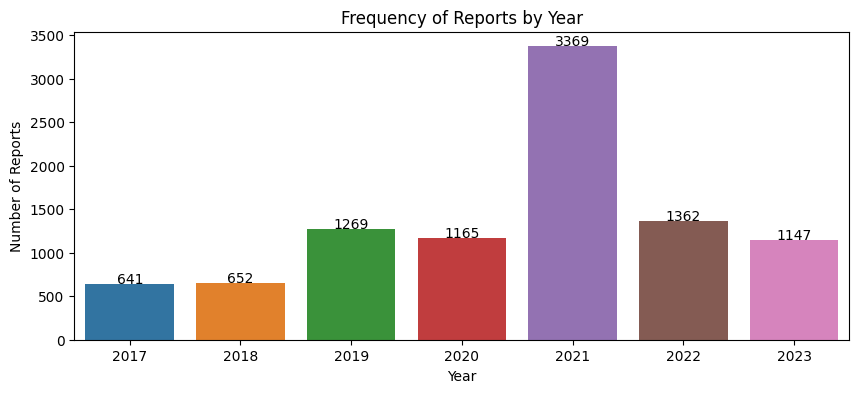

In [31]:
merged_years = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])
year_counts = merged_years.dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=year_counts.index, y=year_counts.values)
for index, value in enumerate(year_counts.values):
    plt.text(index, value+10, str(value), ha='center')
plt.title('Frequency of Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
# plt.xticks(rotation=45)
plt.show()

In [54]:
'DYSPAREUNIA'.lower()

'dyspareunia'

In [16]:
advese_events = {
    "Gastrointestinal" : ["appetite decreased", "constipation", "diarrhea", "dyspepsia", "nausea", "vomiting", "gastrointestinal", "dry mouth"],
    "Fatigue": ["asthenia", "drowsiness", "somnolence", "fatigue"],
    "Pain" : ["hurt", "painful", "ache", "suffering", "intense pain", "severe pain", "misery", "abdominal pain"],
    "UTI Problem": ["voiding dysfunction", "urinary tract infection", "bladder infection", "urine leakage", "persistent incontinence", "bladder neck obstruction", "urinary leakage", "bladder pain", "urethral injury"],
    "Device Problem": ["mesh exposure", "mesh migration", "malfunction", "mesh revision surgery"],
    "Infection": ["infected", "infectious"],
    "Sleep Disorder": ["sleeplessness", "insomnia"],
    "Mental Stress": ["anxiety", "depression", "distress", "strain", "tension", "worried", "restless", "nervous"],
    "Prolapse": ['pelvic prolapse', 'uterine prolapse', 'pelvic organ prolapse', 'terovaginal prolapse'],
    "Vaginal Issue": ['vaginal discharge', 'vaginal atrophy', 'vaginal prolapse', 'vaginal spotting', 'vaginal odor', 'vaginal lesion', 'dyspareunia']  
}

In [31]:
len(merged_files_filtered[merged_files_filtered['FOI_TEXT'].str.contains('pain', case=False)])

2645

In [2]:
print("{:<10} {:<10}".format('advese event', 'keywords'))
 
# print each data item.
for key, value in advese_events.items():
    print("{:<10}: {:<10}".format(key, (", ").join(value)))

advese event keywords  
Gastrointestinal: abdominal pain, appetite decreased, constipation, diarrhea, dyspepsia, nausea, vomiting, gastrointestinal, dry mouth
Fatigue   : asthenia, drowsiness, somnolence, fatigue
Pain      : hurt, painful, ache, suffering, intense pain, severe pain, misery, abdominal pain
Urinary   : voiding dysfunction, urinary tract infection, bladder infection, urine leakage, persistent incontinence, bladder neck obstruction, urinary leakage, bladder pain, urethral injury
Device Problem: mesh exposure, mesh migration, malfunction, mesh revision surgery
Infection : infected, infectious
Sleep Disorder: sleeplessness, insomnia
Mental Stress: anxiety, depression, distress, strain, tension, worried, restless, nervous
Prolapse  : pelvic prolapse, uterine prolapse, pelvic organ prolapse, terovaginal prolapse
Vaginal Issue: vaginal discharge, vaginal atrophy, vaginal prolapse, vaginal spotting, vaginal odor, vaginal lesion, dyspareunia


In [17]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

In [157]:
merged_files_filtered['Years'] = (pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])).dt.year

In [18]:
merged_files_filtered['Year'] = merged_files_filtered['DATE_RECEIVED'].dt.year
merged_files_filtered['Quarter'] = merged_files_filtered['DATE_RECEIVED'].dt.quarter
merged_files_filtered['Year-Quarter'] = merged_files_filtered['Year'].astype(str) + '-Q' + merged_files_filtered['Quarter'].astype(str)

In [19]:
results_all = []

# Process each category
for category, keywords in advese_events.items():
    # Filter rows where 'FOI_TEXT' contains the search string
    search_string = "|".join(keywords).upper()
    filtered_rows = merged_files_filtered[merged_files_filtered['FOI_TEXT'].str.contains(search_string, case=False)]

    num = 0
    for word in keywords:
        num += len(merged_files_filtered[merged_files_filtered['FOI_TEXT'].str.contains(word, case=False)])
    
    # Group by 'Year' and count the number of rows in each group
    # count_by_year = filtered_rows.groupby('Year-Quarter').size().reset_index(name='Count')
    
    # Add the category to the result
    # count_by_year['Category'] = category
    temp = {category: (len(filtered_rows), num, len(filtered_rows)/6600)}
    
    # Append the result to the list
    results_all.append(temp)

results_all

[{'Gastrointestinal': (352, 702, 0.05333333333333334)},
 {'Fatigue': (164, 171, 0.02484848484848485)},
 {'Pain': (1206, 1773, 0.18272727272727274)},
 {'UTI Problem': (745, 964, 0.11287878787878788)},
 {'Device Problem': (361, 364, 0.054696969696969695)},
 {'Infection': (70, 81, 0.010606060606060607)},
 {'Sleep Disorder': (35, 35, 0.005303030303030303)},
 {'Mental Stress': (886, 1344, 0.13424242424242425)},
 {'Prolapse': (303, 345, 0.045909090909090906)},
 {'Vaginal Issue': (1123, 1365, 0.17015151515151516)}]

In [20]:
results = []

# Process each category
for category, keywords in advese_events.items():
    # Filter rows where 'FOI_TEXT' contains the search string
    search_string = "|".join(keywords).upper()
    filtered_rows = merged_files_filtered[merged_files_filtered['FOI_TEXT'].str.contains(search_string, case=False)]
    
    # Group by 'Year' and count the number of rows in each group
    count_by_year = filtered_rows.groupby('Year-Quarter').size().reset_index(name='Count')
    
    # Add the category to the result
    count_by_year['Category'] = category
    
    # Append the result to the list
    results.append(count_by_year)

# Combine all results into a single DataFrame
final_results = pd.concat(results, ignore_index=True)

In [13]:
year_lst = [ str(x) + '-Q' + str(y) for x in [2017, 2018, 2019, 2020, 2021, 2022, 2023] for y in [1,2,3,4]]

In [23]:
pd.DataFrame({'Year-Quarter': "2017", 'Category': "test", 'Count': 0}, index=[0])

,Year-Quarter,Category,Count
0,2017,test,0


In [21]:
res = pd.DataFrame()
for category, _ in advese_events.items():
    for year in year_lst:
        tmp_data = final_results[(final_results["Year-Quarter"] == year) & (final_results["Category"] == category)]
        if len(tmp_data) > 0:
            res = pd.concat([res, tmp_data], ignore_index=True)
        else:
            res = pd.concat([res, pd.DataFrame({'Year-Quarter': year, 'Category': category, 'Count': 0}, index=[0])], ignore_index=True)

In [28]:
res.shape

(56, 3)

In [16]:
len(final_results[(final_results["Year-Quarter"] == "2017-Q2") & (final_results["Category"] == "Gastrointestinal")])

0

In [8]:
final_results.head()

,Year-Quarter,Count,Category
0,2017-Q1,1,Gastrointestinal
1,2017-Q3,2,Gastrointestinal
2,2017-Q4,8,Gastrointestinal
3,2018-Q2,4,Gastrointestinal
4,2018-Q3,8,Gastrointestinal


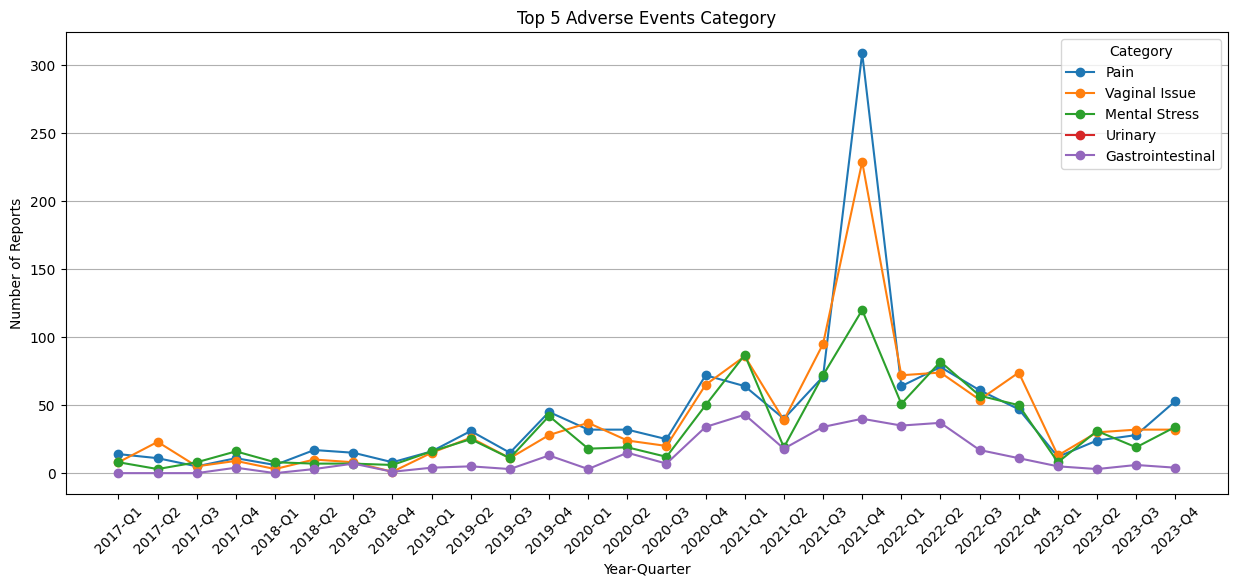

In [34]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(15, 6))
# categories = res['Category'].unique()
categories = ['Pain', 'Vaginal Issue', 'Mental Stress', 'Urinary', 'Gastrointestinal']

for category in categories:
    subset = res[res['Category'] == category]
    plt.plot(subset['Year-Quarter'], subset['Count'], marker='o', label=category)

# Customize the plot
plt.title('Top 5 Adverse Events Category')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Reports')
plt.legend(title='Category')
#plt.grid(True)
plt.grid(True, axis='y')
plt.xticks(rotation=45)

# Set x-axis ticks to be integers
# years = final_results['Year-Quarter'].drop_duplicates().sort_values().to_list()
years = res['Year-Quarter'].unique()
plt.xticks(ticks=years, labels=[str(year) for year in years])

# Show the plot
plt.show()


In [80]:
[x for x in advese_events.keys()]

['Gastrointestinal',
 'Fatigue',
 'Pain',
 'Urinary',
 'Device Problem',
 'Infection',
 'Sleep Disorder',
 'Mental Stress',
 'Prolapse',
 'Vaginal Issue']

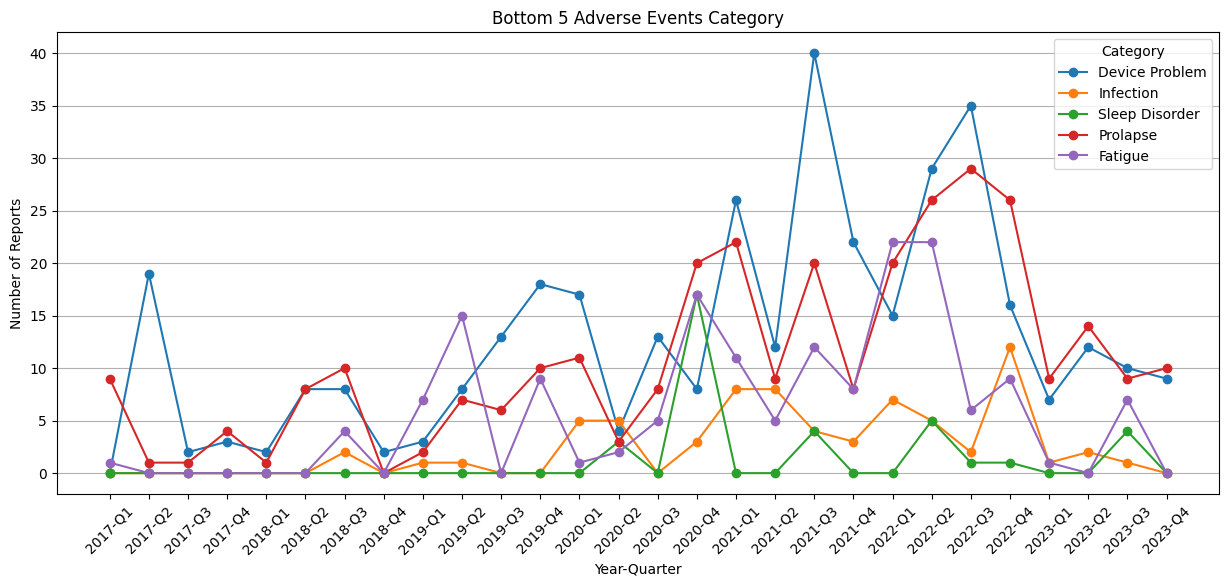

In [35]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(15, 6))
# categories = res['Category'].unique()
categories = ['Device Problem', 'Infection', 'Sleep Disorder', 'Prolapse', 'Fatigue']

for category in categories:
    subset = res[res['Category'] == category]
    plt.plot(subset['Year-Quarter'], subset['Count'], marker='o', label=category)

# Customize the plot
plt.title('Bottom 5 Adverse Events Category')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Reports')
plt.legend(title='Category')
#plt.grid(True)
plt.grid(True, axis='y')
plt.xticks(rotation=45)

# Set x-axis ticks to be integers
# years = final_results['Year-Quarter'].drop_duplicates().sort_values().to_list()
years = res['Year-Quarter'].unique()
plt.xticks(ticks=years, labels=[str(year) for year in years])

# Show the plot
plt.show()


In [94]:
merged_files_filtered["FOI_TEXT"].str.contains('DESATURATION').sum()

3

In [ ]:
# mesh erosion, organ perforation, mesh exposure, severe pain and re-surgery
# voiding dysfunction, dry mouth, fatigue, gastrointestinal complaints,urinary tract infections (UTI)
# 
# CNS: dizziness, Discontinue due to adverse event, Dry mouth, Fatigue: asthenia,
# Fatigue or drowsiness, Fatigue: somnolence, 
# GI: abdominal pain, GI: appetite decreased, GI: constipation, GI: diarrhea, GI: dyspepsia, GI: nausea,
# GI: vomiting, Headache, Infection, urinary tract, Sleep disorder: insomnia, Sweating, excessive, 
# Urinary: voiding dysfunction, Visual adverse effects

In [168]:
"VAGINAL PROLAPSE"

'ASTHENIA|DROWSINESS|SOMNOLENCE|FATIGUE'

In [11]:
merged_files_filtered.shape

(9605, 38)

In [10]:
filtered_df = merged_files_filtered.drop_duplicates(subset=["MDR_REPORT_KEY", "FOI_TEXT"])
filtered_df.shape

(9284, 38)

In [54]:
"URINARY LEAKAGE".lower()

'urinary leakage'

In [68]:
'Arrhythmias'.upper()

'ARRHYTHMIAS'

In [29]:
merged_files_filtered[merged_files_filtered['Year'] == 2021][['MDR_REPORT_KEY', 'FOI_TEXT']].nunique()

MDR_REPORT_KEY    1343
FOI_TEXT          2423
dtype: int64

In [24]:
merged_files_filtered.columns

Index(['Unnamed: 0', 'MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC', 'Year', 'Quarter',
       'Year-Quarter'],
      dtype='object')

In [26]:
df = merged_files_filtered[['MDR_REPORT_KEY', 'FOI_TEXT', 'Year']]
df_no_duplicates = df.dropna().drop_duplicates(keep='last')

In [27]:
df_no_duplicates.shape

(9284, 3)

In [28]:
df_no_duplicates["Year"].value_counts()

Year
2021    3263
2022    1297
2019    1226
2020    1152
2023    1124
2017     613
2018     609
Name: count, dtype: int64

In [ ]:
merged_files_filtered

In [4]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import community  # Louvain algorithm for community detection

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    # Tokenize, remove stop words, and lowercase the text
    tokens = nltk.word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stopwords]
    return ' '.join(tokens)

merged_files_filtered['FOI_TEXT'] = merged_files_filtered['FOI_TEXT'].apply(preprocess_text)

# Create document-term matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(merged_files_filtered['FOI_TEXT'])

In [87]:
import medspacy

# Load the MedSpaCy model
nlp = medspacy.load()

# Sample medical text
text = "The patient was diagnosed with hypertension and prescribed Lisinopril."

# Process the text
doc = nlp(text)

# Extract medical entities
medical_terms = [(ent.text, ent.label_) for ent in doc.ents]

print("Medical Terms:", medical_terms)


Medical Terms: []


In [89]:
import medspacy
from medspacy.ner import TargetRule
from medspacy.visualization import visualize_ent

# Load medspacy model
nlp = medspacy.load()
print(nlp.pipe_names)

text = """
Past Medical History:
1. Atrial fibrillation
2. Type II Diabetes Mellitus

Assessment and Plan:
There is no evidence of pneumonia. Continue warfarin for Afib. Follow up for management of type 2 DM.
"""

# Add rules for target concept extraction
target_matcher = nlp.get_pipe("medspacy_target_matcher")
target_rules = [
    TargetRule("atrial fibrillation", "PROBLEM"),
    TargetRule("atrial fibrillation", "PROBLEM", pattern=[{"LOWER": "afib"}]),
    TargetRule("pneumonia", "PROBLEM"),
    TargetRule("Type II Diabetes Mellitus", "PROBLEM", 
              pattern=[
                  {"LOWER": "type"},
                  {"LOWER": {"IN": ["2", "ii", "two"]}},
                  {"LOWER": {"IN": ["dm", "diabetes"]}},
                  {"LOWER": "mellitus", "OP": "?"}
              ]),
    TargetRule("warfarin", "MEDICATION")
]
target_matcher.add(target_rules)

doc = nlp(text)
visualize_ent(doc)

['medspacy_pyrush', 'medspacy_target_matcher', 'medspacy_context']


In [92]:
[(ent.text, ent.label_) for ent in doc.ents]

[('Atrial fibrillation', 'PROBLEM'),
 ('Type II Diabetes Mellitus', 'PROBLEM'),
 ('pneumonia', 'PROBLEM'),
 ('warfarin', 'MEDICATION'),
 ('Afib', 'PROBLEM'),
 ('type 2 DM', 'PROBLEM')]

In [12]:
import spacy
from spacy import displacy

In [13]:
texts = [str(lst) for review in merged_files_filtered['tokens'] for lst in review]

In [30]:
[(ent.text, ent.label_) for ent in doc.ents]

[('Myeloid', 'ENTITY'),
 ('suppressor cells', 'ENTITY'),
 ('MDSC', 'ENTITY'),
 ('immature', 'ENTITY'),
 ('myeloid cells', 'ENTITY'),
 ('immunosuppressive activity', 'ENTITY'),
 ('accumulate', 'ENTITY'),
 ('tumor-bearing mice', 'ENTITY'),
 ('humans', 'ENTITY'),
 ('cancer', 'ENTITY'),
 ('hepatocellular \ncarcinoma', 'ENTITY'),
 ('HCC', 'ENTITY')]

In [10]:
# results = pd.DataFrame({
#     'text': texts,
#     'entities': medical_entities
# })

In [18]:
nlp = spacy.load("en_ner_bc5cdr_md")

text = """
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity. 
They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC).
"""
doc = nlp(text)

displacy.render(doc, style="ent", jupyter=True)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]


In [27]:
print(doc.ents)

(Myeloid, suppressor cells, MDSC, immature, myeloid cells, immunosuppressive activity, accumulate, tumor-bearing mice, humans, cancer, hepatocellular 
carcinoma, HCC)


In [7]:
[(ent.text, ent.label_) for ent in doc.ents]

[('cancer', 'DISEASE'), ('carcinoma', 'DISEASE'), ('HCC', 'DISEASE')]

In [19]:
new_text = """
THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AGAINST THE DEVICE RESULTING IN AN UNSPECIFIED ADVERSE OUTCOME. PRODUCT WAS USED FOR THERAPEUTIC TREATMENT. THE PREOPERATIVE DIAGNOSIS WAS STRESS URINARY INCONTINENCE, URINARY URGENCY, OVERACTIVE BLADDER, AND URETHROCELE. THE POSTOPERATIVE DIAGNOSIS WAS STRESS URINARY INCONTINENCE, URINARY URGENCY, OVERACTIVE BLADDER, AND URETHROCELE, BLADDER LESION, AND INTERSTITIAL CYSTITIS. THE PROCEDURE PERFORMED WAS A URETHROCELE REPAIR, CYSTOURETHROSCOPY WITH BLADDER BIOPSY, AND A TRANSOBTURATOR TAPE SLING. THE PATIENT RETURNED FOR AN OFFICE VISIT ON (B)(6) 2005 FOR A D/C CATH. THE PATIENT COMPLAINED OF PAIN IN THE TOP OF THE RIGHT LEG. THE PATIENT RETURNED FOR AN OFFICE VISIT ON (B)(6) 2005 FOR BLOOD IN THE URINE. THE PATIENT COMPLAINS OF BLEEDING,CRAMPS, AND THROBBING PAIN. THE PATIENT RETURNED FOR AN OFFICE VISIT ON (B)(6) 2005 FOR PAINFUL INTERCOURSE AND HOT FLASHES AT NIGHT. THE PATIENT RETURNED FOR AN OFFICE VISIT ON (B)(6) 2005 FOR FOLLOW UP FOR YEAST INFECTION. THE PATIENT UNDERWENT AN ADDITIONAL PROCEDURE ON (B)(6) 2008. THE PREOPERATIVE DIAGNOSIS AND POSTOPERATIVE DIAGNOSIS WAS PAINFUL VAGINAL SCAR BAND THAT WAS CAUSING DISCOMFORT FOR HER DURING INTERCOURSE AND PAIN TO HER HUSBAND. THE NAME OF THE PROCEDURE PERFORMED WAS EXCISION OF IRREGULAR VAGINAL SCAR AND EXCISION OF PORTION OF MESH. A PHONE CALL WAS MADE ON (B)(6) 2008 FOR ITCHING/YEAST. THE PATIENT UNDERWENT AN ADDITIONAL PROCEDURE ON (B)(6) 2013. THE PREOPERATIVE AND POSTOPERATIVE DIAGNOSIS WAS A 2.5 MM DISTAL LEFT URETERAL STONE, A 1X2 MM MID LEFT KIDNEY STONE. THE PROCEDURE PERFORMED WAS A RIGID AND FLEXIBLE URETEROSCOPIC STONE EXTRACTION.
""".lower()

In [9]:
new_text

"\nthe patient's attorney alleged a deficiency against the device resulting in an unspecified adverse outcome. product was used for therapeutic treatment. the preoperative diagnosis was stress urinary incontinence, urinary urgency, overactive bladder, and urethrocele. the postoperative diagnosis was stress urinary incontinence, urinary urgency, overactive bladder, and urethrocele, bladder lesion, and interstitial cystitis. the procedure performed was a urethrocele repair, cystourethroscopy with bladder biopsy, and a transobturator tape sling. the patient returned for an office visit on (b)(6) 2005 for a d/c cath. the patient complained of pain in the top of the right leg. the patient returned for an office visit on (b)(6) 2005 for blood in the urine. the patient complains of bleeding,cramps, and throbbing pain. the patient returned for an office visit on (b)(6) 2005 for painful intercourse and hot flashes at night. the patient returned for an office visit on (b)(6) 2005 for follow up f

In [20]:
doc = nlp(new_text)
displacy.render(doc, style="ent", jupyter=True)

In [11]:
[(ent.text, ent.label_) for ent in doc.ents]

[('stress urinary incontinence', 'DISEASE'),
 ('urinary urgency', 'DISEASE'),
 ('overactive bladder', 'DISEASE'),
 ('stress urinary incontinence', 'DISEASE'),
 ('urinary urgency', 'DISEASE'),
 ('overactive bladder', 'DISEASE'),
 ('interstitial cystitis', 'DISEASE'),
 ('pain', 'DISEASE'),
 ('bleeding', 'DISEASE'),
 ('cramps', 'DISEASE'),
 ('pain', 'DISEASE'),
 ('yeast infection', 'DISEASE'),
 ('pain', 'DISEASE'),
 ('left kidney stone', 'DISEASE')]

In [8]:
texts = [str(lst) for review in merged_files_filtered['FOI_TEXT'] for lst in review]

In [14]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [10]:
text_lst = []
i = 0

for text in merged_files_filtered['FOI_TEXT']:

    doc = nlp(text.lower())
    entities = [ent.text for ent in doc.ents if ent.label_ == 'DISEASE']
    if entities != []:
        text_lst.append(entities)
    
text_lst[0]
    

['adenomyosis',
 'uterovaginal prolapse',
 'stress urinary incontinence',
 'cystocele',
 'erosion of vaginal mesh and lesion']

In [46]:
mesh_text = ' '.join(str(lst) for review in text_lst for lst in review)

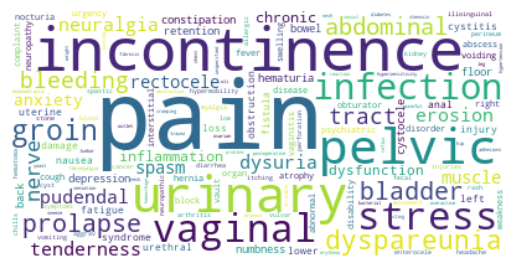

In [48]:
from wordcloud import WordCloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(mesh_text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
[ent.text for ent in doc.ents if ent.label_ == 'DISEASE']

['stress urinary incontinence',
 'urinary urgency',
 'overactive bladder',
 'stress urinary incontinence',
 'urinary urgency',
 'overactive bladder',
 'interstitial cystitis',
 'pain',
 'bleeding',
 'cramps',
 'pain',
 'yeast infection',
 'pain',
 'left kidney stone']

In [19]:
def extract_diseases(text):
    doc = nlp(text.lower())
    diseases = [ent.text for ent in doc.ents if ent.label_ == 'DISEASE']
    return  diseases # Join diseases with a comma for readability


In [15]:
merged_files_filtered['diseases'].head()

0                                                   []
1                                                   []
2                                                   []
3                                                   []
4    ['adenomyosis', 'uterovaginal prolapse', 'stre...
Name: diseases, dtype: object

In [22]:
import ast

# Convert the string representation of lists into actual lists
merged_files_filtered['diseases_lst'] = merged_files_filtered['diseases'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [23]:
text_lst = []
i = 10
for entry in merged_files_filtered['diseases_lst']:
    if isinstance(entry, list) and entry:  # Check if it's a list and not empty
        text_lst.append(entry)

text_lst

[['adenomyosis',
  'uterovaginal prolapse',
  'stress urinary incontinence',
  'cystocele',
  'erosion of vaginal mesh and lesion'],
 ['stress urinary incontinence',
  'urinary urgency',
  'overactive bladder',
  'stress urinary incontinence',
  'urinary urgency',
  'overactive bladder',
  'interstitial cystitis',
  'pain',
  'bleeding',
  'cramps',
  'pain',
  'yeast infection',
  'pain',
  'left kidney stone'],
 ['stress urinary incontinence',
  'incontinence',
  'incontinence',
  'incontinence',
  'vaginal obstruction',
  'incontinence',
  'incontinence',
  'stress urinary incontinence',
  'pain'],
 ['medtronic complaint'],
 ['urinary stress incontinence'],
 ['dysmenorrhea', 'stress incontinence'],
 ['stress urinary incontinence'],
 ['medtronic complaint'],
 ['abscess',
  'vaginal spotting',
  'vaginitis',
  'inflammation',
  'enterocele',
  'prolapse',
  'micro-hematuria',
  'bleeding',
  'blood loss',
  'incontinence',
  'urinary tract infection',
  'vaginal prolapse',
  'vaginal 

In [20]:
# Process each text in the dataset and create a new column for extracted diseases
merged_files_filtered['diseases'] = merged_files_filtered['FOI_TEXT'].apply(extract_diseases)

In [41]:
merged_files_filtered["diseases"].head()

0                                                   []
1                                                   []
2                                                   []
3                                                   []
4    ['adenomyosis', 'uterovaginal prolapse', 'stre...
Name: diseases, dtype: object

In [23]:
merged_files_filtered.to_csv('./data/dataset_with_diseases.csv', index=False)

In [4]:
merged_files_filtered = pd.read_csv("./data/dataset_with_diseases.csv")


In [3]:
[str(lst) for review in text_lst for lst in review]

NameError: name 'text_lst' is not defined

In [24]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(text_lst)

# id2word.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus
texts = text_lst

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [ ]:
text_lst

In [12]:
import gensim
# Build LDA model
lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100,
    chunksize=100,
    passes=10,
    per_word_topics=True,
)

In [13]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.448*"incontinence" + 0.021*"hematuria" + 0.014*"interstitial cystitis" + '
  '0.011*"pyelonephritis" + 0.010*"urinary tract infections" + '
  '0.009*"unspecified injury" + 0.008*"abdominal pain" + 0.008*"stenosis" + '
  '0.008*"bladder outlet obstruction" + 0.008*"nausea"'),
 (1,
  '0.145*"pain" + 0.048*"urinary incontinence" + 0.035*"pelvic pain" + '
  '0.028*"tenderness" + 0.026*"dyspareunia" + 0.021*"stress incontinence" + '
  '0.021*"incontinence" + 0.019*"constipation" + 0.017*"stress urinary '
  'incontinence" + 0.015*"bleeding"'),
 (2,
  '0.475*"pain" + 0.100*"pelvic pain" + 0.066*"vaginal pain" + 0.056*"groin '
  'pain" + 0.024*"anal pain" + 0.018*"psychiatric" + 0.010*"aggrav" + '
  '0.010*"perineum pain" + 0.010*"nerve pain" + 0.010*"depression"'),
 (3,
  '0.164*"pain" + 0.067*"dyspareunia" + 0.036*"inflammation" + '
  '0.031*"infection" + 0.029*"abdominal pain" + 0.029*"dysuria" + '
  '0.026*"pelvic pain" + 0.023*"urinary tract infection" + 0.023*"urinary '
  'rete

In [14]:
from gensim.models import CoherenceModel
# Building LDA model with varying number of topics
min_topics = 2
max_topics = 8
step_size = 1
random_state = 42

coherence_scores = []
lda_model_collection = []
coherence_model_collection = []

for num_topics in range(min_topics, max_topics + step_size, step_size):
    lda_model_collection.append(
        gensim.models.LdaModel(
            corpus,
            num_topics=num_topics,
            random_state=random_state,
            id2word=id2word,
            passes=10,
        )
    )

    coherence_model_collection.append(
        CoherenceModel(
            model=lda_model_collection[num_topics - 2],
            texts=text_lst,
            dictionary=id2word,
            coherence="c_v",
        )
    )

    coherence_scores.append(coherence_model_collection[num_topics - 2].get_coherence())

    print(
        f"Number of topics: {num_topics}, Coherence Score: {coherence_scores[num_topics-2]}"
    )

# Creating DataFrame of number of topics and corresponding coherence score
coherence_scores_df = pd.DataFrame(
    {
        "num_topics": range(min_topics, max_topics + step_size, step_size),
        "coherence_score": coherence_scores,
    }
)

Number of topics: 2, Coherence Score: 0.5280502821681377
Number of topics: 3, Coherence Score: 0.5315687392218772
Number of topics: 4, Coherence Score: 0.5180064870989756
Number of topics: 5, Coherence Score: 0.48059095339022784
Number of topics: 6, Coherence Score: 0.4853390791278109
Number of topics: 7, Coherence Score: 0.4686852980066781
Number of topics: 8, Coherence Score: 0.46985656028725425


In [29]:
selected_num_topics = 3

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append("symmetric")
alpha.append("asymmetric")

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append("symmetric")

hyper_parameter_tuning_lda_model_collection = []
hyper_parameter_tuning_coherence_model_collection = []
hyper_parameter_tuning_coherence_scores = []

hyper_parameter_tuning_results = {
    "num_topics": [],
    "alpha": [],
    "beta": [],
    "coherence_score": [],
}

# iterate through alpha values
for index, a in enumerate(alpha):
    # iterare through beta values
    for b in beta:
        hyper_parameter_tuning_lda_model_collection.append(
            gensim.models.LdaModel(
                corpus,
                num_topics=selected_num_topics,
                alpha=a,
                eta=b,
                random_state=random_state,
                id2word=id2word,
                passes=10,
            )
        )

        hyper_parameter_tuning_coherence_model_collection.append(
            CoherenceModel(
                model=hyper_parameter_tuning_lda_model_collection[-1],
                texts=text_lst,
                dictionary=id2word,
                coherence="c_v",
            )
        )

        hyper_parameter_tuning_coherence_scores.append(
            hyper_parameter_tuning_coherence_model_collection[-1].get_coherence()
        )

        # Save the model results
        hyper_parameter_tuning_results["num_topics"].append(selected_num_topics)
        hyper_parameter_tuning_results["alpha"].append(a)
        hyper_parameter_tuning_results["beta"].append(b)
        hyper_parameter_tuning_results["coherence_score"].append(
            hyper_parameter_tuning_coherence_scores[-1]
        )

        print(
            f"Num_Topics: {selected_num_topics}, Alpha: {a}, Beta: {b}, Coherence_Score: {hyper_parameter_tuning_coherence_scores[-1]}"
        )

hyper_parameter_tuning_results_df = pd.DataFrame(hyper_parameter_tuning_results)

Num_Topics: 3, Alpha: 0.01, Beta: 0.01, Coherence_Score: 0.5239644075160955
Num_Topics: 3, Alpha: 0.01, Beta: 0.31, Coherence_Score: 0.5223227190620227
Num_Topics: 3, Alpha: 0.01, Beta: 0.61, Coherence_Score: 0.4847095007658318
Num_Topics: 3, Alpha: 0.01, Beta: 0.9099999999999999, Coherence_Score: 0.4625839020165135
Num_Topics: 3, Alpha: 0.01, Beta: symmetric, Coherence_Score: 0.5228742899940803
Num_Topics: 3, Alpha: 0.31, Beta: 0.01, Coherence_Score: 0.5448738975320842
Num_Topics: 3, Alpha: 0.31, Beta: 0.31, Coherence_Score: 0.5315687392218771
Num_Topics: 3, Alpha: 0.31, Beta: 0.61, Coherence_Score: 0.5125876309944661
Num_Topics: 3, Alpha: 0.31, Beta: 0.9099999999999999, Coherence_Score: 0.5162270945791451
Num_Topics: 3, Alpha: 0.31, Beta: symmetric, Coherence_Score: 0.5309384906732747
Num_Topics: 3, Alpha: 0.61, Beta: 0.01, Coherence_Score: 0.54273853969426
Num_Topics: 3, Alpha: 0.61, Beta: 0.31, Coherence_Score: 0.5294875847122859
Num_Topics: 3, Alpha: 0.61, Beta: 0.61, Coherence_Sc

In [30]:
hyper_parameter_tuning_results_df

,num_topics,alpha,beta,coherence_score
0,3,0.01,0.01,0.523964
1,3,0.01,0.31,0.522323
2,3,0.01,0.61,0.484710
3,3,0.01,0.91,0.462584
4,3,0.01,symmetric,0.522874
5,3,0.31,0.01,0.544874
6,3,0.31,0.31,0.531569
7,3,0.31,0.61,0.512588
8,3,0.31,0.91,0.516227
9,3,0.31,symmetric,0.530938


In [31]:
hyper_parameter_tuning_max_score_index = hyper_parameter_tuning_results_df[
    "coherence_score"
].idxmax()
print(hyper_parameter_tuning_max_score_index)

28


In [32]:
from gensim.models import CoherenceModel

# Compute Coherence Score
# TODO: Pickle these as the baseline models
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=text_lst, dictionary=id2word, coherence="c_v"
)
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.6265546170113672


In [33]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    # TODO: Pickle each lda_model and coherence_model_lda
    lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        random_state=42,
        chunksize=100,
        passes=10,
        alpha=a,
        eta=b,
    )

    coherence_model_lda = CoherenceModel(
        model=lda_model, texts=text_lst, dictionary=id2word, coherence="c_v"
    )

    return coherence_model_lda.get_coherence()

In [53]:
import numpy as np
import tqdm

grid = {}
grid["Validation_Set"] = {}

# Topics range
min_topics = 3
max_topics = 4
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append("symmetric")
alpha.append("asymmetric")

# alpha = [0.01, 0.5, "symmetric"]

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append("symmetric")
# beta = [0.01, 0.5, "symmetric"]

# Validation sets
num_of_docs = len(corpus)

corpus_sets = [
    gensim.utils.ClippedCorpus(corpus, int(num_of_docs * 0.70)),
    gensim.utils.ClippedCorpus(corpus, int(num_of_docs * 0.75)),
]

corpus_title = ["70% Corpus", "75% Corpus"]

model_results = {
    "Validation_Set": [],
    "Topics": [],
    "Alpha": [],
    "Beta": [],
    "Coherence": [],
}

# Can take a long time to run
if True:
    pbar = tqdm.tqdm(
        total=(len(beta) * len(alpha) * len(topics_range) * len(corpus_title))
    )

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(
                        corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b
                    )
                    # Save the model results
                    model_results["Validation_Set"].append(corpus_title[i])
                    model_results["Topics"].append(k)
                    model_results["Alpha"].append(a)
                    model_results["Beta"].append(b)
                    model_results["Coherence"].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv(
        f"./data/lda_tuning_results.csv", index=False
    )
    pbar.close()

100%|██████████| 60/60 [09:19<00:00,  9.33s/it]


In [56]:
pd.DataFrame(model_results)[
    "Coherence"
].idxmax()

56

In [54]:
pd.DataFrame(model_results)

,Validation_Set,Topics,Alpha,Beta,Coherence
0,70% Corpus,3,0.01,0.01,0.603731
1,70% Corpus,3,0.01,0.31,0.590097
2,70% Corpus,3,0.01,0.61,0.563285
3,70% Corpus,3,0.01,0.91,0.549253
4,70% Corpus,3,0.01,symmetric,0.588306
5,70% Corpus,3,0.31,0.01,0.622156
6,70% Corpus,3,0.31,0.31,0.593991
7,70% Corpus,3,0.31,0.61,0.557773
8,70% Corpus,3,0.31,0.91,0.480714
9,70% Corpus,3,0.31,symmetric,0.573035


In [34]:
# 3	symmetric	0.01	0.611806
# 3 asymmetric 0.91
# 3	asymmetric	0.31	0.646348

num_topics = 3
alpha = 'asymmetric'
beta = 0.31

# num_topics = 2
# alpha = 0.01
# beta = 0.01

lda_model = gensim.models.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=42,
    chunksize=100,
    passes=10,
    alpha=alpha,
    eta=beta,
)

In [35]:
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.206302  0.100146       1        1  35.512097
2     -0.040317 -0.158078       2        1  35.052374
0      0.246619  0.057932       3        1  29.435529, topic_info=                            Term          Freq         Total Category  \
10                          pain  11007.000000  11007.000000  Default   
3    stress urinary incontinence   1132.000000   1132.000000  Default   
13                  incontinence   2346.000000   2346.000000  Default   
179                 vaginal pain   1035.000000   1035.000000  Default   
353                   groin pain    798.000000    798.000000  Default   
..                           ...           ...           ...      ...   
92                     hematuria    141.009950    357.496881   Topic3   
39                   pelvic pain    340.398467   2346.543382   Topic3   
51                       dysuria    152.988515    634.794918   Topic3   
36                abdominal pain    119.045954    647.060541   Topic3   
10                          pain    147.836842  11007.679630   Topic3   

     logprob  loglift  
10   30.0000  30.0000  
3    29.0000  29.0000  
13   28.0000  28.0000  
179  27.0000  27.0000  
353  26.0000  26.0000  
..       ...      ...  
92   -4.6794   0.2927  
39   -3.7981  -0.7076  
51   -4.5979  -0.2000  
36   -4.8487  -0.4700  
10   -4.6321  -3.0873  

[212 rows x 6 columns], token_table=      Topic      Freq                       Term
term                                            
36        1  0.055636             abdominal pain
36        2  0.760362             abdominal pain
36        3  0.183909             abdominal pain
1556      2  0.977477       abnormal muscle tone
90        1  0.059390  abnormal uterine bleeding
...     ...       ...                        ...
118       3  0.947787             vault prolapse
234       3  0.996524        voiding dysfunction
299       2  0.933131                   vomiting
299       3  0.066652                   vomiting
2117      2  0.983731                   wheezing

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [46]:
LDAvis_prepared.topic_info[LDAvis_prepared.topic_info["Category"] == "Topic2"]

,Term,Freq,Total,Category,logprob,loglift
993,anal pain,410.875134,413.495984,Topic2,-3.9094,0.9172
1925,perineum pain,181.514916,183.356956,Topic2,-4.7263,0.9134
727,psychiatric,309.225155,312.508396,Topic2,-4.1936,0.9130
1767,aggrav,179.857149,182.052546,Topic2,-4.7355,0.9114
1,cystocele,134.331606,140.290584,Topic2,-5.0274,0.8801
744,dryness,54.097294,56.700933,Topic2,-5.9369,0.8765
13,incontinence,2146.566554,2253.837148,Topic2,-2.2560,0.8748
1979,thrush,31.209732,33.245988,Topic2,-6.4869,0.8603
234,voiding dysfunction,67.995960,72.712834,Topic2,-5.7082,0.8565
131,urinary retention,187.339572,201.379268,Topic2,-4.6947,0.8513


Topic 1:


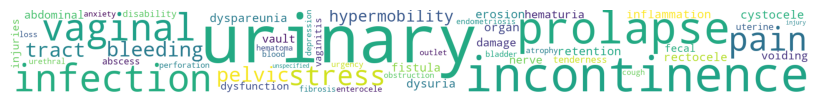

------------------------------
Topic 2:


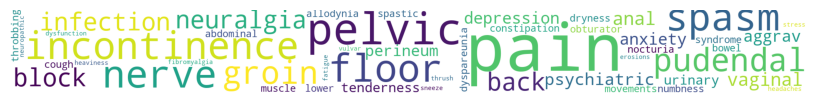

------------------------------
Topic 3:


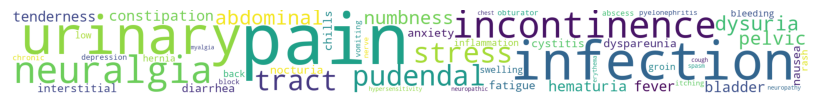

------------------------------


In [36]:
from wordcloud import WordCloud

topics = lda_model.show_topics(num_topics=3, num_words=50)
for topic in topics:
    print(f"Topic {topic[0]+1}:")
    wordcloud = WordCloud(
        width=1920, background_color="white", stopwords=stop_words, min_font_size=10
    ).generate(topic[1])
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    print("-" * 30)

In [37]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.072*"incontinence" + 0.069*"stress urinary incontinence" + '
  '0.054*"dyspareunia" + 0.039*"urinary incontinence" + 0.031*"stress '
  'incontinence" + 0.027*"bleeding" + 0.024*"rectocele" + 0.022*"pelvic pain" '
  '+ 0.020*"infection" + 0.019*"inflammation"'),
 (1,
  '0.421*"pain" + 0.090*"pelvic pain" + 0.068*"incontinence" + 0.055*"vaginal '
  'pain" + 0.044*"groin pain" + 0.018*"anal pain" + 0.014*"psychiatric" + '
  '0.010*"depression" + 0.009*"anxiety" + 0.008*"nerve pain"'),
 (2,
  '0.174*"pain" + 0.027*"abdominal pain" + 0.027*"dysuria" + 0.020*"pelvic '
  'pain" + 0.016*"numbness" + 0.014*"constipation" + 0.013*"pudendal '
  'neuralgia" + 0.013*"bladder pain" + 0.012*"infection" + 0.012*"hematuria"')]


In [38]:
import pandas as pd
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Topics range
min_topics = 1
max_topics = 50
step = 1

# The number of top words per topic
num_top_words = 30

# Initial random state
random_state = 42

In [66]:
# # Converting the preprocessed sentences to a list
processed_sentences = merged_files_filtered["diseases"]


# # Creating a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words="english")
vectorized_sentences = vectorizer.fit_transform(processed_sentences)

# Creating an empty dataframe to hold the NMF weights
nmf_weights_df = pd.DataFrame()

coherence_scores = []
nmf_model_collection = []
nmf_result_collection = []
coherence_model_collection = []

for k in range(step, max_topics + 1, step):
    nmf_model_collection.append(
        NMF(n_components=k, random_state=random_state, init="nndsvda")
    )

    # Fit the model to the data
    nmf_result_collection.append(
        nmf_model_collection[-1].fit_transform(vectorized_sentences)
    )

    vocab = vectorizer.get_feature_names_out()

    topics = []

    for topic_index, topic in enumerate(nmf_model_collection[-1].components_):
        top_words = [vocab[i] for i in topic.argsort()[: -num_top_words - 1 : -1]]
        topics.append(top_words)

        # Adding the NMF weights to the dataframe
        nmf_weights = pd.DataFrame(topic).T.add_prefix("Topic_")
        nmf_weights["k"] = k
        # nmf_weights_df = nmf_weights_df.append(nmf_weights)
        nmf_weights_df = pd.concat([nmf_weights_df, nmf_weights])

    # Normalizing the NMF weights so they sum to 1
    nmf_weights_df.iloc[:, :-1] = nmf_weights_df.iloc[:, :-1].div(
        nmf_weights_df.iloc[:, :-1].sum(axis=1), axis=0
    )

    # splitting each sentence into a list of words
    texts = (
        merged_files_filtered["diseases"]
        .apply(lambda x: nltk.word_tokenize(x))
        .tolist()
    )

    # Creating a dictionary from the words
    dictionary = corpora.Dictionary(texts)

    # Creating a bag-of-words representation of the corpus
    corpus = [dictionary.doc2bow(word) for word in texts]

    coherence_model_collection.append(
        CoherenceModel(
            topics=topics, texts=texts, dictionary=dictionary, coherence="c_v"
        )
    )

    coherence_scores.append(coherence_model_collection[-1].get_coherence())

    print(f"Number of topics: {k}, Coherence Score: {coherence_scores[-1]}")

# Creating DataFrame of number of topics and corresponding coherence score
coherence_scores_df = pd.DataFrame(
    {"k": range(min_topics, max_topics + 1), "coherence_score": coherence_scores}
)

Number of topics: 1, Coherence Score: 0.4414962275043618
Number of topics: 2, Coherence Score: 0.3928337610314169
Number of topics: 3, Coherence Score: 0.5116520539373801
Number of topics: 4, Coherence Score: 0.4492424759147319
Number of topics: 5, Coherence Score: 0.45606532524638654
Number of topics: 6, Coherence Score: 0.47291055881185334
Number of topics: 7, Coherence Score: 0.46668615200906577
Number of topics: 8, Coherence Score: 0.4734560081651398
Number of topics: 9, Coherence Score: 0.4785167170918071
Number of topics: 10, Coherence Score: 0.48141928302632253
Number of topics: 11, Coherence Score: 0.4916289759262283
Number of topics: 12, Coherence Score: 0.5127569586626985
Number of topics: 13, Coherence Score: 0.5160086975000072
Number of topics: 14, Coherence Score: 0.5459197521777445
Number of topics: 15, Coherence Score: 0.5570677991693771
Number of topics: 16, Coherence Score: 0.5507194821801453
Number of topics: 17, Coherence Score: 0.5540588263070011
Number of topics: 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 40, Coherence Score: 0.5984435869842565


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 41, Coherence Score: 0.5989287732816427


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 42, Coherence Score: 0.6004847503056097


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 43, Coherence Score: 0.6084906322361427


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 44, Coherence Score: 0.6080642750657297


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 45, Coherence Score: 0.6064135256283939


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 46, Coherence Score: 0.6122479965144747


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 47, Coherence Score: 0.618388028768772


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 48, Coherence Score: 0.6176169173176297


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 49, Coherence Score: 0.617530873609023


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics: 50, Coherence Score: 0.6172867353043894


In [67]:
coherence_scores_df

,k,coherence_score
0,1,0.441496
1,2,0.392834
2,3,0.511652
3,4,0.449242
4,5,0.456065
5,6,0.472911
6,7,0.466686
7,8,0.473456
8,9,0.478517
9,10,0.481419


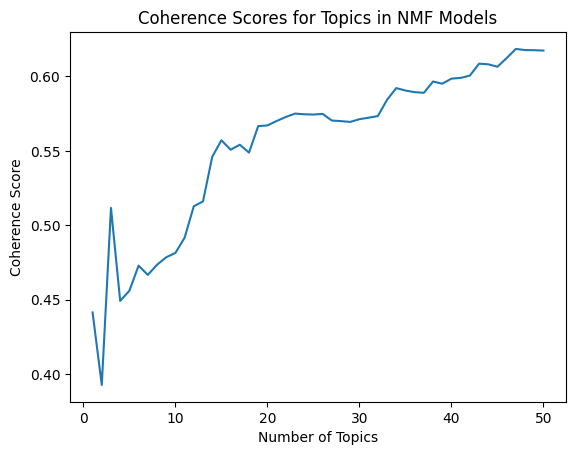

In [68]:
# Plotting the coherence score for each number of topics
k = range(min_topics, max_topics + 1)
plt.plot(k, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Topics in NMF Models")
plt.show()

In [52]:
# Select the best hyper parameters
max_score_index = coherence_scores_df["coherence_score"].idxmax()
print(max_score_index)

13


In [75]:
nmf_model_collection[2]

NMF(init='nndsvda', n_components=3, random_state=42)

In [53]:
# Select the row with the highest score
max_row = coherence_scores_df.loc[coherence_scores_df["coherence_score"].idxmax()]

selected_k = max_row["k"]
selected_score = max_row["coherence_score"]

# print the value of num_topics with the highest coherence score
print(f"Index for the highest coherence score              : {max_score_index}")
print(f"Selected num_topics for the highest coherence score: {selected_k}")
print(f"Selected score for the highest coherence score     : {selected_score}")

Index for the highest coherence score              : 13
Selected num_topics for the highest coherence score: 14.0
Selected score for the highest coherence score     : 0.40775149247229636


In [69]:
max_score_index = 2

In [70]:
topics = []

for topic_index, topic in enumerate(nmf_model_collection[max_score_index].components_):
    top_words = [vocab[i] for i in topic.argsort()[: -num_top_words - 1 : -1]]

    topics.append(top_words)

    # Adding the NMF weights to the dataframe
    nmf_weights = pd.DataFrame(topic).T.add_prefix("Topic_")
    nmf_weights["k"] = selected_k
    # nmf_weights_df = nmf_weights_df.append(nmf_weights)
    nmf_weights_df = pd.concat([nmf_weights_df, nmf_weights])


# Normalizing the NMF weights so they sum to 1
nmf_weights_df.iloc[:, :-1] = nmf_weights_df.iloc[:, :-1].div(
    nmf_weights_df.iloc[:, :-1].sum(axis=1), axis=0
)

# Creating a dataframe of the top 10 words for each topic
top_words_df = pd.DataFrame(
    topics, columns=[f"word_{i+1}" for i in range(num_top_words)]
)
top_words_df

,word_1,word_2,word_3,word_4,word_5,word_6,word_7,word_8,word_9,word_10,...,word_21,word_22,word_23,word_24,word_25,word_26,word_27,word_28,word_29,word_30
0,pain,pelvic,vaginal,groin,dyspareunia,anal,infection,nerve,abdominal,psychiatric,...,erosion,perineum,pudendal,chronic,prolapse,damage,muscle,tenderness,constipation,numbness
1,incontinence,stress,psychiatric,vaginal,perineum,hypermobility,nocturia,thrush,uti,trauma,...,symptoms,tumor,cough,ache,swelling,poca,fecal,loosened,rectocele,overactivity
2,urinary,stress,retention,prolapse,tract,infection,dyspareunia,rectocele,cystocele,erosion,...,inflammation,hematuria,organ,hypermobility,injury,abdominal,enterocele,voiding,perforation,obstruction


In [ ]:
topics = []
word_weights = []

# For each topic in the NMF model
for topic_index, topic in enumerate(nmf_model_collection[max_score_index].components_):
    # Get the top words for the topic based on the highest weights
    top_word_indices = topic.argsort()[: -num_top_words - 1 : -1]
    
    # Retrieve the corresponding words and their weights
    top_words = [vocab[i] for i in top_word_indices]
    top_weights = [topic[i] for i in top_word_indices]
    
    # Combine words and their weights together in a formatted string: "word (weight)"
    top_words_with_weights = [f"{word} ({weight:.4f})" for word, weight in zip(top_words, top_weights)]
    
    # Append to the lists
    topics.append(top_words_with_weights)
    word_weights.append(top_weights)

    # Adding the NMF weights to the dataframe
    nmf_weights = pd.DataFrame(topic).T.add_prefix("Topic_")
    nmf_weights["k"] = selected_k
    nmf_weights_df = pd.concat([nmf_weights_df, nmf_weights])

# Creating a dataframe of the top words with weights for each topic
top_words_df = pd.DataFrame(
    topics, columns=[f"word_{i+1}" for i in range(num_top_words)]
)

# Show the resulting dataframe
print(top_words_df)


In [91]:
topics[0]

['pain (5.8871)',
 'pelvic (1.0805)',
 'vaginal (0.7456)',
 'groin (0.6341)',
 'dyspareunia (0.3483)',
 'anal (0.2845)',
 'infection (0.2449)',
 'nerve (0.2001)',
 'abdominal (0.1987)',
 'psychiatric (0.1757)',
 'aggrav (0.1713)',
 'infections (0.1635)',
 'bladder (0.1419)',
 'bleeding (0.1340)',
 'neuralgia (0.1279)',
 'depression (0.1248)',
 'tract (0.1199)',
 'inflammation (0.1188)',
 'anxiety (0.1185)',
 'dysuria (0.1178)',
 'erosion (0.1153)',
 'perineum (0.1130)',
 'pudendal (0.1056)',
 'chronic (0.0948)',
 'prolapse (0.0933)',
 'damage (0.0898)',
 'muscle (0.0862)',
 'tenderness (0.0857)',
 'constipation (0.0788)',
 'numbness (0.0761)']

In [73]:
for i, topic in enumerate(topics):
    print(f"Topic {i+1}:")
    print(" ".join(topic))
    print("\n")


Topic 1:
pain pelvic vaginal groin dyspareunia anal infection nerve abdominal psychiatric aggrav infections bladder bleeding neuralgia depression tract inflammation anxiety dysuria erosion perineum pudendal chronic prolapse damage muscle tenderness constipation numbness


Topic 2:
incontinence stress psychiatric vaginal perineum hypermobility nocturia thrush uti trauma dryness pelvic leaks vomiting urge buttock cancer tape mood swings symptoms tumor cough ache swelling poca fecal loosened rectocele overactivity


Topic 3:
urinary stress retention prolapse tract infection dyspareunia rectocele cystocele erosion infections bleeding pelvic bladder vaginal dysuria dysfunction uterine vault urethral inflammation hematuria organ hypermobility injury abdominal enterocele voiding perforation obstruction




In [76]:
def display_topics_gensim(model):
    for topic in range(0, model.num_topics):
        print("\nTopic %02d" % topic)
        for (word, prob) in model.show_topic(topic, topn=5):
            print("  %s (%2.2f)" % (word, prob))

In [82]:
from gensim.models.nmf import Nmf

In [93]:
nmf_gensim_model = Nmf(corpus, num_topics=3, id2word=id2word, kappa=0.1, eval_every=5, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/models/nmf.py:578: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/models/nmf.py:607: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  if isinstance(corpus, scipy.sparse.csc.csc_matrix):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gensim/models/nmf.py:620: DeprecationWarning: Please use `c

In [94]:
display_topics_gensim(nmf_gensim_model)


Topic 00
  left kidney stone (0.18)
  erosion of vaginal mesh and lesion (0.18)
  erythema (0.08)
  anemia (0.04)
  perforation (0.01)

Topic 01
  erosion of vaginal mesh and lesion (0.26)
  left kidney stone (0.26)
  erythema (0.05)
  anemia (0.02)
  pain (0.02)

Topic 02
  erosion of vaginal mesh and lesion (0.27)
  left kidney stone (0.27)
  erythema (0.05)
  anemia (0.02)
  perforation (0.02)


In [95]:
pd.set_option('max_colwidth', 1000)
nmf_topic = pd.DataFrame(nmf_gensim_model.print_topics(), columns=['Topics', 'Proba*Word'])
nmf_topic

,Topics,Proba*Word
0,0,"0.181*""left kidney stone"" + 0.178*""erosion of vaginal mesh and lesion"" + 0.080*""erythema"" + 0.044*""anemia"" + 0.009*""perforation"" + 0.007*""migraines"" + 0.005*""nerve damage"" + 0.004*""chest pain"" + 0.004*""acute pain"" + 0.004*""lethargy"""
1,1,"0.262*""erosion of vaginal mesh and lesion"" + 0.258*""left kidney stone"" + 0.049*""erythema"" + 0.020*""anemia"" + 0.019*""pain"" + 0.019*""perforation"" + 0.014*""granuloma"" + 0.013*""vaginal bacterial infection"" + 0.010*""cramps"" + 0.009*""vaginal obstruction"""
2,2,"0.273*""erosion of vaginal mesh and lesion"" + 0.271*""left kidney stone"" + 0.051*""erythema"" + 0.021*""anemia"" + 0.020*""perforation"" + 0.018*""pain"" + 0.015*""granuloma"" + 0.013*""vaginal bacterial infection"" + 0.009*""cramps"" + 0.008*""vaginal obstruction"""


In [37]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(text_lst)

# id2word.filter_extremes(no_below=5, no_above=0.5)

# Create Corpus
texts = text_lst

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [6]:
merged_files_filtered.columns

Index(['Unnamed: 0', 'MDR_REPORT_KEY', 'MDR_TEXT_KEY', 'TEXT_TYPE_CODE',
       'PATIENT_SEQUENCE_NUMBER', 'DATE_REPORT', 'FOI_TEXT',
       'DEVICE_EVENT_KEY', 'IMPLANT_FLAG', 'DATE_REMOVED_FLAG',
       'DEVICE_SEQUENCE_NO', 'DATE_RECEIVED', 'BRAND_NAME', 'GENERIC_NAME',
       'MANUFACTURER_D_NAME', 'MANUFACTURER_D_ADDRESS_1',
       'MANUFACTURER_D_ADDRESS_2', 'MANUFACTURER_D_CITY',
       'MANUFACTURER_D_STATE_CODE', 'MANUFACTURER_D_ZIP_CODE',
       'MANUFACTURER_D_ZIP_CODE_EXT', 'MANUFACTURER_D_COUNTRY_CODE',
       'MANUFACTURER_D_POSTAL_CODE', 'DEVICE_OPERATOR',
       'EXPIRATION_DATE_OF_DEVICE', 'MODEL_NUMBER', 'CATALOG_NUMBER',
       'LOT_NUMBER', 'OTHER_ID_NUMBER', 'DEVICE_AVAILABILITY',
       'DATE_RETURNED_TO_MANUFACTURER', 'DEVICE_REPORT_PRODUCT_CODE',
       'DEVICE_AGE_TEXT', 'DEVICE_EVALUATED_BY_MANUFACTUR',
       'COMBINATION_PRODUCT_FLAG', 'UDI-DI', 'UDI-PUBLIC', 'tokens',
       'diseases'],
      dtype='object')

In [9]:
stop_words = set(stopwords.words('english'))

In [11]:
stop_words.add('[')
stop_words.add(']')

In [14]:
merged_files_filtered["disease_tokens"] = merged_files_filtered["diseases"].apply(lambda x: x.replace('[', '').replace(']', '').replace(',', '') if isinstance(x, str) else x)

In [12]:

merged_files_filtered['disease_tokens'] = merged_files_filtered['diseases'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words and word.lower()])


In [15]:
merged_files_filtered['disease_tokens'].head(15) 

0                                                      
1                                                      
2                                                      
3                                                      
4     'adenomyosis' 'uterovaginal prolapse' 'stress ...
5                                                      
6                                                      
7     'stress urinary incontinence' 'urinary urgency...
8                                                      
9                                                      
10    'stress urinary incontinence' 'incontinence' '...
11                                'medtronic complaint'
12                                                     
13                                                     
14                                                     
Name: disease_tokens, dtype: object

In [25]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.nmf import Nmf

import warnings
warnings.filterwarnings("ignore")

# Converting the preprocessed sentences to a list
processed_sentences = merged_files_filtered["disease_tokens"]


# Creating a TfidfVectorizer object
vectorizer = TfidfVectorizer(stop_words="english")
vectorized_sentences = vectorizer.fit_transform(processed_sentences)

# Splitting each sentence into a list of words for Gensim
texts = text_lst
# processed_sentences.apply(lambda x: nltk.word_tokenize(x)).tolist()

# Creating a dictionary from the words
dictionary = corpora.Dictionary(texts)

# Creating a bag-of-words representation of the corpus
corpus = [dictionary.doc2bow(text) for text in texts]

# Creating an empty dataframe to hold the NMF weights
nmf_weights_df = pd.DataFrame()

# To store coherence scores and models
coherence_scores = []
nmf_model_collection = []
nmf_result_collection = []
coherence_model_collection = []

# Running NMF for different values of k (number of topics)
for k in range(step, max_topics + 1, step):
    # Fit NMF model using Gensim's Nmf
    nmf_model = Nmf(corpus=corpus, num_topics=k, id2word=dictionary, random_state=random_state)
    
    nmf_model_collection.append(nmf_model)

    # Get the topics as list of top words
    topics = nmf_model.show_topics(num_topics=k, num_words=num_top_words, formatted=False)

    # Extract top words for each topic
    topics_words = [[word for word, weight in topic_words] for _, topic_words in topics]

    # Add the NMF weights to the dataframe (optional, for tracking purposes)
    nmf_weights = pd.DataFrame([dict(topic_words) for _, topic_words in topics]).add_prefix("Topic_")
    nmf_weights["k"] = k
    nmf_weights_df = pd.concat([nmf_weights_df, nmf_weights])

    # Normalize the weights so they sum to 1
    nmf_weights_df.iloc[:, :-1] = nmf_weights_df.iloc[:, :-1].div(nmf_weights_df.iloc[:, :-1].sum(axis=1), axis=0)

    # Compute Coherence Score using Gensim's CoherenceModel
    coherence_model = CoherenceModel(
        model=nmf_model, texts=texts, dictionary=dictionary, coherence="c_v"
    )
    coherence_model_collection.append(coherence_model)

    # Append the coherence score
    coherence_scores.append(coherence_model.get_coherence())

    print(f"Number of topics: {k}, Coherence Score: {coherence_scores[-1]}")

# Creating a DataFrame for coherence scores for each number of topics (k)
coherence_scores_df = pd.DataFrame(
    {"k": range(min_topics, max_topics + 1), "coherence_score": coherence_scores}
)

# Print the resulting coherence scores dataframe
print(coherence_scores_df)


Number of topics: 1, Coherence Score: 0.6665615993604576
Number of topics: 2, Coherence Score: 0.6776711452606552
Number of topics: 3, Coherence Score: 0.5563676223745052
Number of topics: 4, Coherence Score: 0.5595855933356695
Number of topics: 5, Coherence Score: 0.5759927306120394
Number of topics: 6, Coherence Score: 0.5574275513672897
Number of topics: 7, Coherence Score: 0.5869518560158519
Number of topics: 8, Coherence Score: 0.5348470283734656
Number of topics: 9, Coherence Score: 0.5561030548034358
Number of topics: 10, Coherence Score: 0.5333665536986179
Number of topics: 11, Coherence Score: 0.5357933230572799
Number of topics: 12, Coherence Score: 0.52362948869919
Number of topics: 13, Coherence Score: 0.5307455757695114
Number of topics: 14, Coherence Score: 0.5360394344082092
Number of topics: 15, Coherence Score: 0.5022108838262382
Number of topics: 16, Coherence Score: 0.5147732894911268
Number of topics: 17, Coherence Score: 0.5178903783870137
Number of topics: 18, Coh

In [26]:
coherence_scores_df

,k,coherence_score
0,1,0.666562
1,2,0.677671
2,3,0.556368
3,4,0.559586
4,5,0.575993
5,6,0.557428
6,7,0.586952
7,8,0.534847
8,9,0.556103
9,10,0.533367


In [1]:
nmf_model_collection[2].print_topics()

NameError: name 'nmf_model_collection' is not defined